In [1]:
import numpy as np 

#### Exercice 0 : S'échauffer
Créez un tableau NumPy de valeurs de 0 à 2π divisé en 100 parties.
Calculez le sinus et le cosinus de ces valeurs.
Utilisez `np.round()` pour arrondir les résultats à 2 décimales.


In [10]:
tab = np.linspace(1, 2 * np.pi, 100)

In [11]:
tab_cos = np.cos(tab).round(2)
tab_cos

array([ 0.54,  0.49,  0.45,  0.4 ,  0.35,  0.3 ,  0.25,  0.2 ,  0.14,
        0.09,  0.04, -0.02, -0.07, -0.12, -0.18, -0.23, -0.28, -0.33,
       -0.38, -0.43, -0.48, -0.52, -0.57, -0.61, -0.65, -0.69, -0.73,
       -0.76, -0.8 , -0.83, -0.86, -0.88, -0.91, -0.93, -0.95, -0.96,
       -0.98, -0.99, -0.99, -1.  , -1.  , -1.  , -1.  , -0.99, -0.98,
       -0.97, -0.95, -0.93, -0.91, -0.89, -0.86, -0.84, -0.81, -0.77,
       -0.74, -0.7 , -0.66, -0.62, -0.58, -0.53, -0.49, -0.44, -0.39,
       -0.34, -0.29, -0.24, -0.19, -0.14, -0.08, -0.03,  0.02,  0.08,
        0.13,  0.18,  0.23,  0.29,  0.34,  0.39,  0.44,  0.48,  0.53,
        0.57,  0.62,  0.66,  0.7 ,  0.73,  0.77,  0.8 ,  0.83,  0.86,
        0.89,  0.91,  0.93,  0.95,  0.96,  0.98,  0.99,  0.99,  1.  ,
        1.  ])

In [12]:
tab_sin = np.sin(tab).round(2)
tab_sin

array([ 0.84,  0.87,  0.89,  0.92,  0.94,  0.95,  0.97,  0.98,  0.99,
        1.  ,  1.  ,  1.  ,  1.  ,  0.99,  0.98,  0.97,  0.96,  0.94,
        0.92,  0.9 ,  0.88,  0.85,  0.82,  0.79,  0.76,  0.72,  0.68,
        0.64,  0.6 ,  0.56,  0.51,  0.47,  0.42,  0.37,  0.32,  0.27,
        0.22,  0.17,  0.11,  0.06,  0.01, -0.05, -0.1 , -0.15, -0.21,
       -0.26, -0.31, -0.36, -0.41, -0.46, -0.5 , -0.55, -0.59, -0.63,
       -0.67, -0.71, -0.75, -0.78, -0.82, -0.85, -0.87, -0.9 , -0.92,
       -0.94, -0.96, -0.97, -0.98, -0.99, -1.  , -1.  , -1.  , -1.  ,
       -0.99, -0.98, -0.97, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.85,
       -0.82, -0.79, -0.75, -0.72, -0.68, -0.64, -0.6 , -0.55, -0.51,
       -0.46, -0.41, -0.36, -0.31, -0.26, -0.21, -0.16, -0.11, -0.05,
       -0.  ])

### Exercice 1 : Le Jeu du Bingo
Créez un programme qui génère une carte de bingo 5x5 où chaque cellule contient un nombre aléatoire unique entre 1 et 75.

Ensuite, simulez le tirage de numéros aléatoires entre 1 et 75 et marquez les numéros sur votre carte de bingo. 

Le but est de voir combien de tirages sont nécessaires pour compléter une ligne ou une colonne.

In [8]:
# Importation des modules nécessaires
import random
import numpy as np 

def bingo():
    # Création d'une carte de bingo de 5x5 avec des nombres aléatoires uniques de 1 à 75
    carte_bingo = np.array(random.sample(range(1, 76), 25)).reshape(5, 5)
    
    # Initialisation d'un ensemble pour conserver les numéros tirés
    numeros_tires = set()

    # Compteur pour le nombre de tirages
    n_tirage = 1

    # Boucle infinie pour simuler le jeu de bingo
    while(True):        
        # Tirage de 5 nombres aléatoires uniques de 1 à 75
        tirage_nombres = set(random.sample(range(1, 76), 5))

        # Mise à jour de l'ensemble des numéros tirés
        numeros_tires.update(tirage_nombres)
    
        # Mise à jour de la carte de bingo, en remplaçant les numéros tirés par '*'
        carte_bingo_updated = [['*' if num in numeros_tires else num for num in row] for row in carte_bingo]
        carte_bingo_updated = np.array(carte_bingo_updated)  

        # Vérification de l'achèvement d'une colonne
        colonne_full = np.sum(carte_bingo_updated == "*", axis=0)
        if 5 in colonne_full:
            print(f" Nombre de tirage :{n_tirage}")
            print("Une colonne complétée")
            break

        # Vérification de l'achèvement d'une ligne
        ligne_full = np.sum(carte_bingo_updated == "*", axis=1)
        if 5 in ligne_full:
            print(f" Nombre de tirage :{n_tirage}")
            print("Une ligne complétée")
            break

        # Incrémentation du compteur de tirage
        n_tirage += 1

    # Retour de la carte de bingo mise à jour
    return carte_bingo_updated

# Appel de la fonction bingo pour lancer le jeu
bingo()


 Nombre de tirage :16
Une colonne complétée


(array([['*', '53', '*', '*', '*'],
        ['*', '*', '*', '66', '42'],
        ['40', '12', '*', '50', '*'],
        ['*', '*', '*', '9', '*'],
        ['*', '55', '*', '22', '17']], dtype='<U11'),
 array([[ 3, 53, 11, 13,  2],
        [23, 25, 21, 66, 42],
        [40, 12, 74, 50, 73],
        [10, 14, 48,  9, 49],
        [19, 55,  6, 22, 17]]))

### Exercice 2 : Le Puzzle des Pixels
Imaginez un tableau NumPy 10x10 rempli de zéros. 

Écrivez un programme qui change la couleur (valeur) de pixels aléatoires pour créer un motif ou une image.

Vous pouvez par exemple essayer de créer un motif en damier.



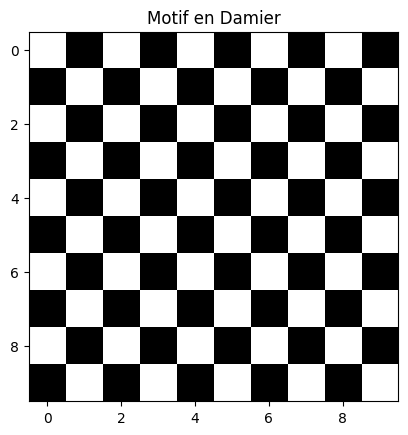

In [21]:
# Importation des modules nécessaires
import random           # Importe le module 'random' pour générer des nombres aléatoires (non utilisé dans ce code)
import numpy as np      # Importe le module 'numpy' pour les opérations sur les tableaux

###### OPTIONNEL
import matplotlib.pyplot as plt  # Importe le module 'matplotlib.pyplot' pour la visualisation de données

# Créer un tableau NumPy 10x10 rempli de zéros
tableau = np.zeros((10, 10), dtype=int)  # Initialise un tableau 10x10 avec des zéros, en spécifiant un type de données entier

# Créer un motif en damier
for i in range(tableau.shape[0]):        # Boucle sur les lignes du tableau
    for j in range(tableau.shape[1]):    # Boucle sur les colonnes du tableau
        if (i + j) % 2 == 0:            # Vérifie si la somme des indices de ligne et de colonne est divisible par 10
            tableau[i, j] = 1            # Si vrai, change la valeur du pixel en 1 pour créer un motif

# Afficher le tableau avec le motif en damier
tableau_damier = tableau                 # Assignation du tableau modifié à une nouvelle variable (optionnel)
tableau_damier                           # Affiche le tableau en sortie (utile dans un environnement de notebook)

###### OPTIONNEL
# Utiliser matplotlib pour afficher le tableau en damier comme une image
plt.imshow(tableau_damier, cmap='gray')  # Utilise 'imshow' pour afficher le tableau sous forme d'image, avec une carte des couleurs en gris
plt.title("Motif en Damier")             # Ajoute un titre à l'image
plt.show()                               # Affiche l'image

### Exercice 3 : Le Labyrinthe

Objectif : Créer un jeu de labyrinthe où le joueur doit naviguer à travers pour atteindre une sortie.

Description :
1. Génération du Labyrinthe : Écrivez une fonction `generer_labyrinthe(taille)` qui crée un labyrinthe de taille `n x n`. 
Chaque cellule du labyrinthe est accessible ou non, déterminé de manière aléatoire.

import numpy as np
import random

def generer_labyrinthe(taille):
    labyrinthe = np.random.choice([0, 1], size=(taille, taille), p=[0.7, 0.3])
    labyrinthe[0, 0] = 0  # Point de départ
    labyrinthe[taille-1, taille-1] = 0  # Sortie
    return labyrinthe

generer_labyrinthe(10)

2. Affichage du Labyrinthe : Créez une fonction `afficher_labyrinthe(labyrinthe)` qui affiche le labyrinthe sur la console. Utilisez différents caractères pour les murs, les chemins libres, la position du joueur, et la sortie.

3. Mouvement du Joueur : Implémentez une fonction `deplacer_joueur(labyrinthe, position, mouvement)` qui déplace le joueur dans le labyrinthe. Le joueur ne peut pas traverser les murs et ne peut se déplacer que dans les limites du labyrinthe.

4. Trouver la Sortie : Le joueur doit naviguer à travers le labyrinthe pour trouver la sortie. Écrivez une fonction `trouver_sortie(labyrinthe, position_joueur)` qui détermine si le joueur a atteint la sortie.

5. Jeu Principal : Créez une fonction `jouer()` qui utilise toutes les fonctions ci-dessus pour créer une expérience de jeu interactive. Le joueur peut entrer des commandes pour se déplacer dans le labyrinthe.

Défis supplémentaires :
- Ajoutez un système de score basé sur le nombre de mouvements effectués.
- Intégrez des pièges ou des bonus dans le labyrinthe.
- Créez des niveaux de difficulté variés, où la taille du labyrinthe et la complexité augmentent.


### Exercice 4 : Simulation de Population
Créez un tableau NumPy pour représenter un espace 2D où chaque cellule peut être vide ou contenir une créature. 

Les créatures peuvent se déplacer, se reproduire ou mourir en fonction de règles simples que vous définissez.

Par exemple, imaginons que chaque creature tire une lettre:
- "d" elle se déplace dans une case random et disponible (sans autre créature).
- "r" elle se reproduit et sa valeur augmente de "+1"
- "m" elle meurt sur le champs


In [27]:
import numpy as np
import random

# Initialisation du tableau 2D
taille = 5
tableau = np.zeros((taille, taille), dtype=int)

# Placer quelques créatures au hasard
nombre_creatures = 5
for _ in range(nombre_creatures):
    x, y = np.random.randint(0, taille, size=2)
    tableau[x, y] = 1  # Créature de base représentée par 1

tableau

array([[0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0]])

In [28]:
def mettre_a_jour_tableau(tableau):
    taille = tableau.shape[0]
    actions = ['d', 'r', 'm']
    nouveau_tableau = np.copy(tableau)

    for x in range(taille):
        for y in range(taille):
            if tableau[x, y] > 0:  # Si la cellule contient une créature
                action = random.choice(actions)

                if action == 'd':  # Déplacement
                    # Trouver une case vide
                    cases_vides = np.argwhere(nouveau_tableau == 0)
                    if len(cases_vides) > 0:
                        nouvelle_position = random.choice(cases_vides)
                        nouveau_tableau[nouvelle_position[0], nouvelle_position[1]] = nouveau_tableau[x, y]
                        nouveau_tableau[x, y] = 0

                elif action == 'r':  # Reproduction
                    nouveau_tableau[x, y] += 1

                elif action == 'm':  # Mort
                    nouveau_tableau[x, y] = 0

    return nouveau_tableau

# Mettre à jour le tableau pour une itération
tableau_apres_mise_a_jour = mettre_a_jour_tableau(tableau)
tableau_apres_mise_a_jour

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0]])

### Exercice 5 : Analyse de Données de Ventes
Imaginez que vous avez des données de ventes pour différents produits. 

Les données sont représentées dans un tableau NumPy où chaque ligne est un produit et chaque colonne une semaine de vente. 

Calculez des statistiques comme les ventes moyennes, le produit le plus vendu, la semaine avec les ventes maximales, etc.


In [29]:
# Création d'un tableau fictif de données de ventes
np.random.seed(0)  # Pour la reproductibilité
ventes = np.random.randint(0, 100, (5, 4))  # 5 produits, 4 semaines

# Calcul des statistiques
ventes_moyennes_par_produit = np.mean(ventes, axis=1)
ventes_moyennes_par_semaine = np.mean(ventes, axis=0)
produit_le_plus_vendu = np.argmax(np.sum(ventes, axis=1))
semaine_avec_ventes_maximales = np.argmax(np.sum(ventes, axis=0))

ventes, ventes_moyennes_par_produit, ventes_moyennes_par_semaine, produit_le_plus_vendu, semaine_avec_ventes_maximales


(array([[44, 47, 64, 67],
        [67,  9, 83, 21],
        [36, 87, 70, 88],
        [88, 12, 58, 65],
        [39, 87, 46, 88]]),
 array([55.5 , 45.  , 70.25, 55.75, 65.  ]),
 array([54.8, 48.4, 64.2, 65.8]),
 2,
 3)

### Exercice 6 : Le Morpion
Programmez un jeu de morpion simple où deux joueurs entrent leurs coups à tour de rôle. 

Utilisez un tableau NumPy pour représenter le plateau de jeu (3x3) et 

vérifiez l'état du jeu après chaque coup pour déterminer le gagnant.


In [30]:
def initialiser_plateau():
    """Initialise le plateau de jeu."""
    return np.zeros((3, 3), dtype=int)

def coup_valide(plateau, ligne, colonne):
    """Vérifie si un coup est valide."""
    return 0 <= ligne < 3 and 0 <= colonne < 3 and plateau[ligne, colonne] == 0

def jouer_coup(plateau, joueur, ligne, colonne):
    """Joue un coup sur le plateau."""
    if coup_valide(plateau, ligne, colonne):
        plateau[ligne, colonne] = joueur
        return True
    return False

def verifier_gagnant(plateau):
    """Vérifie si un joueur a gagné."""
    # Vérifier les lignes, colonnes et diagonales
    for i in range(3):
        if (plateau[i, :].sum() == 3) or (plateau[:, i].sum() == 3):
            return 1  # Joueur 1 gagne
        if (plateau[i, :].sum() == 6) or (plateau[:, i].sum() == 6):
            return 2  # Joueur 2 gagne
    
    # Diagonales
    if (plateau.trace() == 3) or (np.fliplr(plateau).trace() == 3):
        return 1  # Joueur 1 gagne
    if (plateau.trace() == 6) or (np.fliplr(plateau).trace() == 6):
        return 2  # Joueur 2 gagne

    # Pas de gagnant
    return 0

def plateau_plein(plateau):
    """Vérifie si le plateau est plein."""
    return not (plateau == 0).any()

# Initialisation du plateau de jeu
plateau = initialiser_plateau()
plateau, coup_valide(plateau, 1, 1), jouer_coup(plateau, 1, 1, 1), verifier_gagnant(plateau), plateau_plein(plateau)


(array([[0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]]),
 True,
 True,
 0,
 False)